<a href="https://colab.research.google.com/github/dinilsonpedroza/Jupyter/blob/main/deflacionamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEFLACIONAMENTO**
------
***

In [201]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlopen ### Bibliotecas que serão usadas no trabalho.

Na raspagem de dados usamos uma função do *Pandas* que permite trazer para nosso espaço de trabalho um objeto arquivado em **Json** (Java Script Object Notation, formato ideal para transferência de arquivos). Para que a operação seja possível, é necessário que o site onde pegamos os dados disponha de **API** (Application Programming Interface, rotinas que facilitam a transferênica de dados em sites nos quais eles esteja arquivados). Como pretendemos apresentar o PIB em termos nominais, a séries trabalhadas serão: **PIB per capita nominal** e **índice de preços**. Ambas do IBGE.

**PIB per capita nominal**
---


In [202]:
linkPIBpc= 'https://apisidra.ibge.gov.br/values/t/6784/n1/all/v/9812/p/all/d/v9812%202' ### PIB pc nominal. Este endereço foi pego no SIDRA - IBGE.

In [203]:
DFPIBpc = pd.read_json(linkPIBpc) ### Usando a função read_json para fazer a raspagem de dados com o link anterior.

In [204]:
DFPIBpc.head() ### Visualizando o início da tabela que foi pega (um data frame).

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Ano (Código),Ano
1,1,Brasil,38,Reais,5219.36,1,Brasil,9812,PIB per capita - valores correntes,1996,1996
2,1,Brasil,38,Reais,5729.02,1,Brasil,9812,PIB per capita - valores correntes,1997,1997
3,1,Brasil,38,Reais,5944.92,1,Brasil,9812,PIB per capita - valores correntes,1998,1998
4,1,Brasil,38,Reais,6359.80,1,Brasil,9812,PIB per capita - valores correntes,1999,1999


In [205]:
type(DFPIBpc) ### Verificando o tipo de objeto criado: data frame.

pandas.core.frame.DataFrame

In [206]:
PIBpc = DFPIBpc.drop([0], axis=0) ### Excluindo a primeira linha do data frame, para facilitar a leitura.

In [207]:
PIBpc.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
1,1,Brasil,38,Reais,5219.36,1,Brasil,9812,PIB per capita - valores correntes,1996,1996
2,1,Brasil,38,Reais,5729.02,1,Brasil,9812,PIB per capita - valores correntes,1997,1997
3,1,Brasil,38,Reais,5944.92,1,Brasil,9812,PIB per capita - valores correntes,1998,1998
4,1,Brasil,38,Reais,6359.80,1,Brasil,9812,PIB per capita - valores correntes,1999,1999
5,1,Brasil,38,Reais,6900.62,1,Brasil,9812,PIB per capita - valores correntes,2000,2000


In [218]:
pibpc = PIBpc[["V", "D3C"]] ### Criando um outro data frame só com os valores que interessam.

In [219]:
pibpc.head()

,V,D3C
1,5219.36,1996
2,5729.02,1997
3,5944.92,1998
4,6359.80,1999
5,6900.62,2000


In [220]:
pibpc.rename(columns={'D3C': 'Anos'}, inplace = True) ### Renomeando a coluna de datas (de D3C para Anos).

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Apesar no nome da variável ("Anos") se referir a uma unidade de tempo, a coluna não é, para o Python, uma coluna de datas. Precisamos transformá-la em tempo. Uma das formas é a empregada a seguir: vamos fazer com que a coluna "Index", que sempre consta nos data frames, seja considerada, ela, a coluna do tempo.

In [221]:
pibpc.index= pd.DatetimeIndex(pibpc['Anos']).year

In [223]:
pibpc.head()

,V,Anos
Anos,,
1996,5219.36,1996
1997,5729.02,1997
1998,5944.92,1998
1999,6359.80,1999
2000,6900.62,2000


Notem que a terceira coluna do data frame *pibpc* é redundante. Vamos tratar de excluí-la.

In [224]:
pibpcdf = pibpc.drop(pibpc.columns[[1]], axis=1, inplace=True) ### Atenção para as mudanças de nomes, não são obrigatórias.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [225]:
PIBPC = pibpc.astype(float) ### Convertendo a arquivo para uma formato númerico (float). Atenção para a mudança de nome, mais uma vez.

In [226]:
PIBPC.head()

,V
Anos,
1996,5219.36
1997,5729.02
1998,5944.92
1999,6359.80
2000,6900.62


In [227]:
PIBPC.tail()

,V
Anos,
2015,29466.85
2016,30558.75
2017,31843.95
2018,33593.82
2019,35161.70


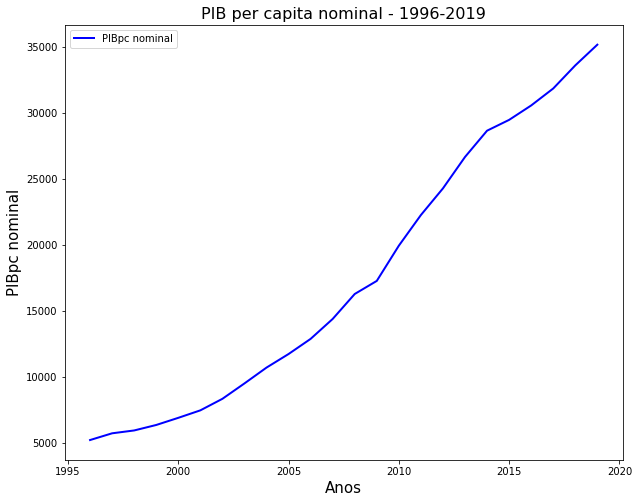

In [228]:
plt.rcParams['figure.figsize'] = (10,8)
plt.title('PIB per capita nominal - 1996-2019',fontsize = 16)
plt.plot(PIBPC.V,lw =2, label = 'PIBpc nominal', c= 'b') ### estou fazendo um gráfico da śerie "V".
plt.ylabel("PIBpc nominal",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'upper left')

**IPCA**
---

**Instruções para pegar a série do IPCA no Sidra-IBGE**

 Nesse endereço, você pega o endereço JSON da **tabela 1737** do SIDRA-IBGE: https://sidra.ibge.gov.br/tabela/1737 .


Na página da tabela 1737, as seleções que você deve fazer são as seguintes: **Variável:** IPCA - Número-índice (base: dezembro de 1993 = 100) (Número-índice): 13 de 13 casas decimais.
**Mês:** Clique na lupa e escreva "dezembro". Marque os anos de 1995 até 2019 (para bater com a série de PIB per capita nominal).
Clique no botão "Links de compartilhar" no fim de página.
Copie o endereço de **Parâmetros para API**. Esse endereço será usado no comando seguinte.

In [229]:
linkIPCA = 'https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2266/p/199612,199712,199812,199912,200012,200112,200212,200312,200412,200512,200612,200712,200812,200912,201012,201112,201212,201312,201412,201512,201612,201712,201812,201912/d/v2266%2013'

In [230]:
DFIPCA = pd.read_json(linkIPCA) ### Usando a função read_json para fazer a raspagem de dados com o link anterior.

In [231]:
DFIPCA.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Mês (Código),Mês
1,1,Brasil,30,Número-índice,1363.2400000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199612,dezembro 1996
2,1,Brasil,30,Número-índice,1434.4600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199712,dezembro 1997
3,1,Brasil,30,Número-índice,1458.2000000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199812,dezembro 1998
4,1,Brasil,30,Número-índice,1588.5600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199912,dezembro 1999


In [232]:
IPCA = DFIPCA.drop([0], axis=0) ### Excluindo a primeira linha do data frame, para facilitar a leitura.

In [233]:
IPCA.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
1,1,Brasil,30,Número-índice,1363.2400000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199612,dezembro 1996
2,1,Brasil,30,Número-índice,1434.4600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199712,dezembro 1997
3,1,Brasil,30,Número-índice,1458.2000000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199812,dezembro 1998
4,1,Brasil,30,Número-índice,1588.5600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199912,dezembro 1999
5,1,Brasil,30,Número-índice,1683.4700000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,200012,dezembro 2000


Por causa da maneira como as datas aparecem nesse data frame, é mais interessante incluir uma coluna de datas em um data frame com os valores.

In [234]:
ipca = IPCA[["V"]] ### Criando um outro data frame só com os valores que interessam.

In [235]:
ipca.head()

,V
1,1363.2400000000000
2,1434.4600000000000
3,1458.2000000000000
4,1588.5600000000000
5,1683.4700000000000


In [236]:
Ipca = ipca.astype(float) ### Convertendo a arquivo para uma formato númerico (float).

In [239]:
Ipca['Anos'] = pd.date_range(start='1996', periods=len(ipca['V']), freq='Y') ### Acrescentando uma coluna de datas (anos), já no formato de datas do Python.

In [240]:
Ipca.head()

,V,Anos
1,1363.24,1996-12-31
2,1434.46,1997-12-31
3,1458.20,1998-12-31
4,1588.56,1999-12-31
5,1683.47,2000-12-31


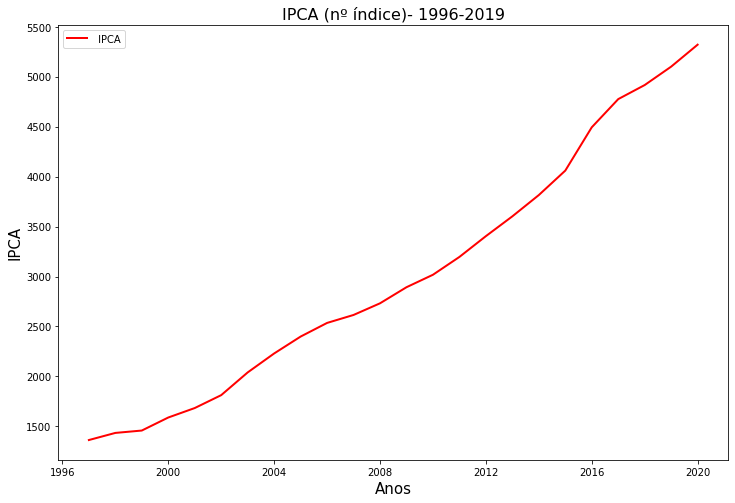

In [241]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('IPCA (nº índice)- 1996-2019',fontsize = 16)
plt.plot(Ipca.Anos,Ipca.V,lw =2, label = ' IPCA', c= 'r')
plt.ylabel("IPCA",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'upper left')

Para deflacionar a série do PIB per capita nominal e apresentá-la a preços de 2019, precisamos multiplicar a série pelo fator: $IPCA_{2019}/IPCA_i$.

In [242]:
Ipca.tail() ### Verificando qual o IPCA de 2019.

,V,Anos
20,4493.17,2015-12-31
21,4775.70,2016-12-31
22,4916.46,2017-12-31
23,5100.61,2018-12-31
24,5320.25,2019-12-31


In [243]:
ipca2019 = Ipca['V'].iloc[-1] ### Estamos selecionando a última lina da coluna de valores do Ipca.

In [244]:
ipca2019

5320.25

Precisamos agora multiplicar esse ipca2019 pelo inverso da coluna de valores de IPCA (ou seja, a coluna Ipca.V). Primeiro vamos tratar de inverter a coluna Ipca.V.

In [245]:
Inv_IPCA= np.power(Ipca.V, -1) ### Estamos aqui invertendo os valores de Inv_IPCA.

In [246]:
Inv_IPCA.head()

1    0.000734
2    0.000697
3    0.000686
4    0.000630
5    0.000594
Name: V, dtype: float64

In [247]:
mult = ipca2019*Inv_IPCA ### Multiplicando o IPCA de 2019 pelo vetor Inv_IPCA.

In [248]:
mult.head()

1    3.902651
2    3.708887
3    3.648505
4    3.349102
5    3.160288
Name: V, dtype: float64

Finalmente, precisamos multiplicar essa coluna de mutiplicadores (*mult*) pela coluna com os valores dos PIB per capita nominais. Atençao: não se trata de uma multiplicação de vetores ou matrizes, mas de uma multiplicação de elemento a elemento de dois vetores de dimensões iguais. É o que em matemática se chama de produto Hadamard (em homenagem ao matemático francês Jacques Hadamard (1865-1963). Vamos usar a funções da biblioteca **numpy** na operação.

In [249]:
a = np.array([PIBPC['V']]) ### Criando um *array* em numpy para o PIB per capita nominal.

In [250]:
a

array([[ 5219.36,  5729.02,  5944.92,  6359.8 ,  6900.62,  7467.03,
         8340.58,  9506.76, 10705.99, 11733.45, 12880.52, 14390.01,
        16280.82, 17271.34, 19938.6 , 22259.91, 24278.35, 26657.54,
        28648.74, 29466.85, 30558.75, 31843.95, 33593.82, 35161.7 ]])

In [251]:
b = np.array([mult]) ### Criando um array em numpy para os multiplicadores.

In [252]:
b

array([[3.90265104, 3.70888697, 3.64850501, 3.34910233, 3.16028798,
        2.93506744, 2.60824697, 2.38630808, 2.21776883, 2.09838684,
        2.03447353, 1.94765377, 1.83909695, 1.76307915, 1.66471624,
        1.56306464, 1.47683805, 1.39441839, 1.31045159, 1.18407494,
        1.11402517, 1.08213023, 1.04306152, 1.        ]])

In [253]:
c = np.multiply(a,b) ### Multiplicando os dois vetores (*arrays*) recém criados.

In [254]:
c

array([[20369.3407177 , 21248.28761694, 21690.07038129, 21299.62100896,
        21807.94641722, 21916.23664662, 21754.29249478, 22686.05819717,
        23743.41090887, 24621.31709494, 26205.07696985, 28026.75727316,
        29942.00638987, 30450.73937646, 33192.1113211 , 34793.6781641 ,
        35855.19106041, 37171.76414076, 37542.7869397 , 34890.95865781,
        34043.21663578, 34459.30099858, 35040.4208232 , 35161.7       ]])

In [255]:
PIBpc_real = pd.DataFrame(c) ### Transformando o *array* em numpy em um data frame em pandas.

In [256]:
PIBpc_real

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,20369.340718,21248.287617,21690.070381,21299.621009,21807.946417,21916.236647,21754.292495,22686.058197,23743.410909,24621.317095,26205.07697,28026.757273,29942.00639,30450.739376,33192.111321,34793.678164,35855.19106,37171.764141,37542.78694,34890.958658,34043.216636,34459.300999,35040.420823,35161.7


In [257]:
PIBpc_real = PIBpc_real.T ### Transpondo o data frame recém criado.

In [258]:
PIBpc_real.head()

,0
0,20369.340718
1,21248.287617
2,21690.070381
3,21299.621009
4,21807.946417


In [259]:
PIBpc_real['Anos'] = pd.date_range(start='1996', periods=len(PIBpc_real), freq='Y') ### Acrescentando uma coluna de datas (anos), já no formato de datas do Python.

In [260]:
PIBpc_real.head()

,0,Anos
0,20369.340718,1996-12-31
1,21248.287617,1997-12-31
2,21690.070381,1998-12-31
3,21299.621009,1999-12-31
4,21807.946417,2000-12-31


In [261]:
PIBpc_real.columns = ['PIBpc', 'Anos'] ### Dando nomes as duas colunas.

In [262]:
PIBpc_real.head()

,PIBpc,Anos
0,20369.340718,1996-12-31
1,21248.287617,1997-12-31
2,21690.070381,1998-12-31
3,21299.621009,1999-12-31
4,21807.946417,2000-12-31


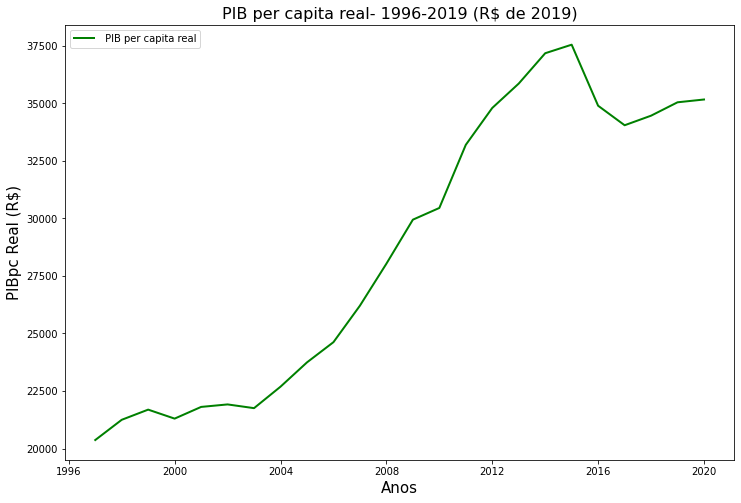

In [263]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('PIB per capita real- 1996-2019 (R$ de 2019)',fontsize = 16)
plt.plot(PIBpc_real.Anos, PIBpc_real.PIBpc,lw =2, label = ' PIB per capita real', c= 'g')
plt.ylabel("PIBpc Real (R$)",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'upper left')

Vamos agora juntar as duas séries, **PIBpc nominal** e **PIBpc real**, em um mesmo gráfico.

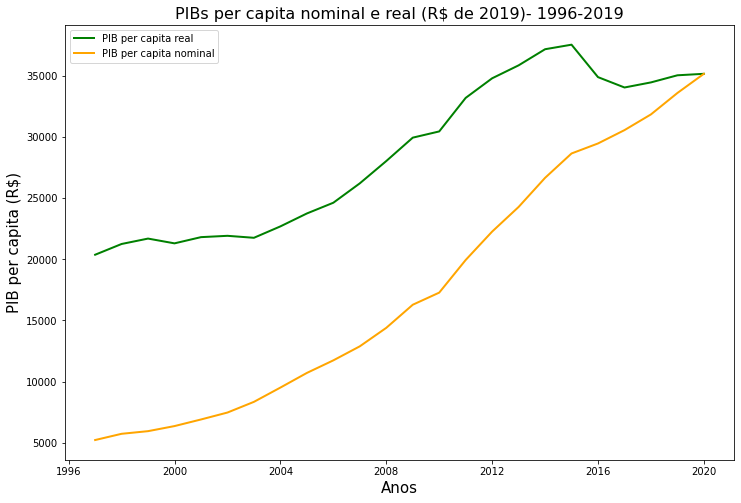

In [266]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('PIBs per capita nominal e real (R$ de 2019)- 1996-2019',fontsize = 16)
plt.plot(PIBpc_real.Anos, PIBpc_real.PIBpc,lw =2, label = 'PIB per capita real', c= 'g')
plt.plot(PIBpc_real.Anos, PIBPC.V, lw=2, label= 'PIB per capita nominal', c='orange')
plt.ylabel("PIB per capita (R$)",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'upper left')
plt.savefig('pibpcnominal&real')